In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



hd = pd.read_csv('cleveland.csv')
hd.dropna(inplace=True)
hd = hd[hd.ca != '?']
hd = hd[hd.thal != '?']
print(hd.shape)
hd.boxplot()
plt.xticks(rotation = 90)
plt.show()


(297, 14)


<Figure size 640x480 with 1 Axes>

(282, 14)


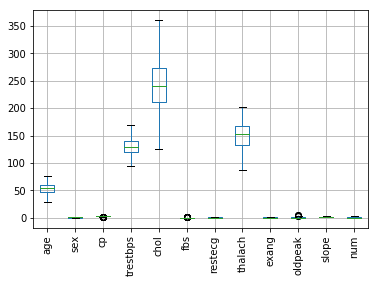

In [32]:
def remove_outliers(hd, cols):
    for col in cols:
        Q3 = hd[col].quantile(.75)
        Q1 = hd[col].quantile(.25)
        IQR = Q3 - Q1
        hd = hd[~((hd[col] < Q1 - 1.5 * IQR) | (hd[col] > Q3 + 1.5 * IQR))]
    return hd

hd = remove_outliers(hd, ['trestbps', 'chol', 'thalach'])
print(hd.shape)
hd.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [33]:
hd['num'][hd['num'] != 0] = 1
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

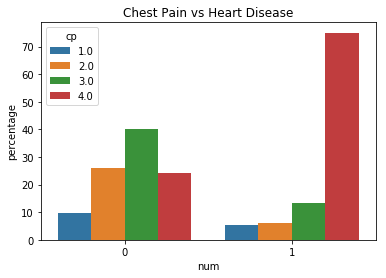

In [34]:
temp = (hd.groupby(['num']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "cp", data = temp)\
.set_title("Chest Pain vs Heart Disease")

Text(0.5, 1.0, 'FBS vs Target')

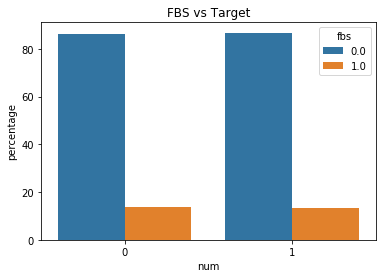

In [35]:
temp = (hd.groupby(['num']))['fbs'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "fbs", data = temp).set_title("FBS vs Target")

Text(0.5, 1.0, 'resting electrocardiographic results vs Heart Disease')

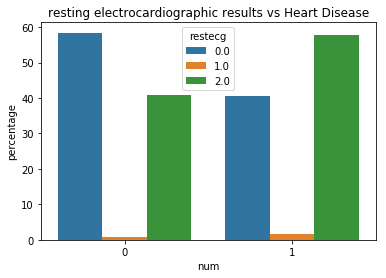

In [36]:
temp = (hd.groupby(['num']))['restecg'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "restecg", data = temp)\
.set_title("resting electrocardiographic results vs Heart Disease")
                     

Text(0.5, 1.0, 'ca vs Heart Disease')

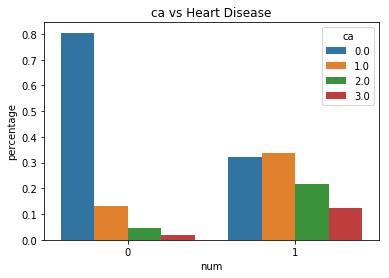

In [40]:
temp = (hd.groupby(['num']))['ca'].value_counts(normalize=True)\
.reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "ca", data = temp)\
.set_title("ca vs Heart Disease")

Text(0.5, 1.0, 'thal vs Heart Disease')

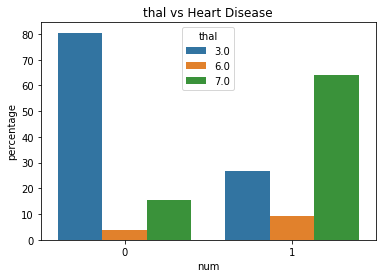

In [38]:
temp = (hd.groupby(['num']))['thal'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "thal", data = temp)\
.set_title("thal vs Heart Disease")

Text(0.5, 1.0, 'sex vs Heart Disease')

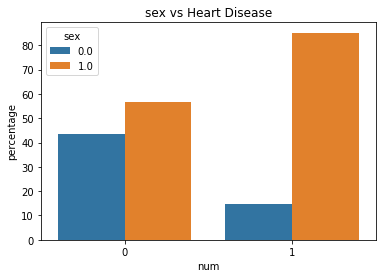

In [39]:
temp = (hd.groupby(['num']))['sex'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "sex", data = temp)\
.set_title("sex vs Heart Disease")